In [1]:
# Import 3rd party packages

using DifferentialEquations, StochasticDiffEq, LinearAlgebra, Calculus, Discretizers, KernelDensity, Distributions
using JLD2, FileIO, DataFrames, LaTeXStrings;
using DelimitedFiles,CSV, Query;
using Plots;

In [2]:
# v(x) = a1*(x-1.5)^4/4 - b1*(x-1.5)^3/3 - c1*(x-1.5)^2/2 - d1
# v'(x) = a1*(x-1.5)^3 - b1*(x-1.5)^2 - c1*(x-1.5) - d1
# f(x) = -v'(x)

#######################################################
# f(x) = -a1*(x-1.5)^3 + b1*(x-1.5)^2 + c1*(x-1.5) + d1
# g(x) = α(x-1.5)
#######################################################

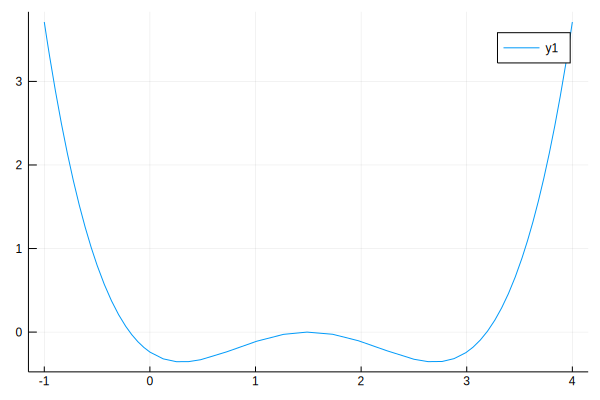

In [3]:
a1=0.7
b1=0.0
c1=1.0
d1=0.0

v(x) = (a1*(x-1.5)^4)/4 - (b1*(x-1.5)^3)/3 - (c1*(x-1.5)^2)/2 - d1*(x-1.5)

plot(v,-1,4)

# Compute the stable stationary points and then unstable stationary points

# when d=0.1
# stable=0.35832
# stable=2.7424
# unstable=1.39928

# when d=0.0
# stable=0.30477
# stable=2.6952
# unstable=1.5

In [4]:
#######################################################
# MULTIPLICATIVE NOISE: MOST SIMPLE POLYNOMIAL D=0
#######################################################

In [5]:
##################################################
# ANALYTICAL STEADY STATE PROBABILITY DISTRIBUTION
##################################################

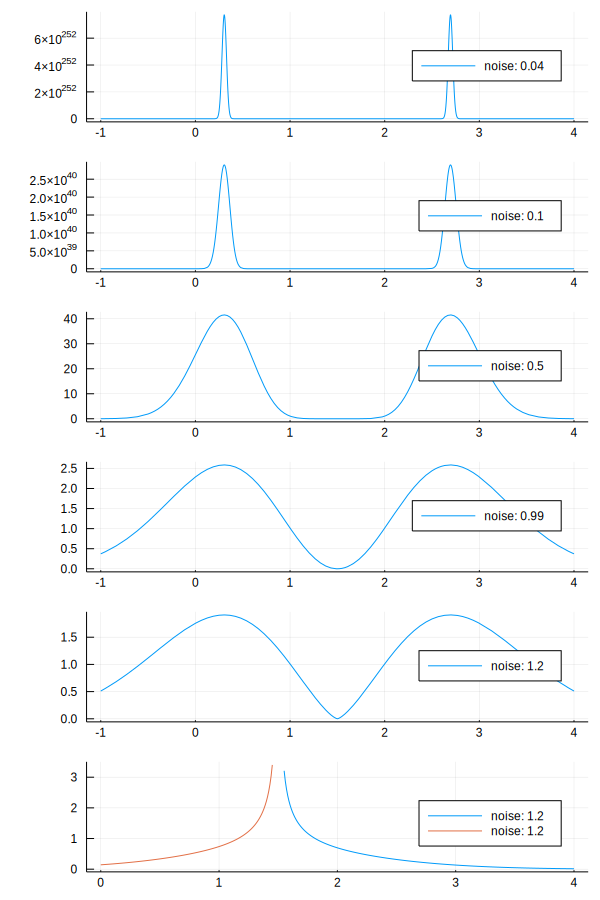

In [6]:
################################################################
# ADJUSTING NOISE LEVELS AND EFFECT ON NORMALISED SSD WITH D=0.0
################################################################

α=0.04
psx_1(x) = exp( 
    - ((a1*x^2)/(α^2)) + ((2*x*(1.5*a1+b1))/(α^2)) + (2*c1*log(abs(x-1.5))/α^2) - ((2*d1)/((α^2)*(x-1.5))) ) 
p1=plot(psx_1,-1,4,label=("noise: $α"))

α=0.1
psx_2(x) = exp( 
    - ((a1*x^2)/(α^2)) + ((2*x*(1.5*a1+b1))/(α^2)) + (2*c1*log(abs(x-1.5))/α^2) - ((2*d1)/((α^2)*(x-1.5))) ) 
p2=plot(psx_2,-1,4,label=("noise: $α"))

α=0.5
psx_3(x) = exp(
    - ((a1*x^2)/(α^2)) + ((2*x*(1.5*a1+b1))/(α^2)) + (2*c1*log(abs(x-1.5))/α^2) - ((2*d1)/((α^2)*(x-1.5))) ) 
p3=plot(psx_3,-1,4,label=("noise: $α"))

α=0.99
psx_4(x) = exp(
    - ((a1*x^2)/(α^2)) + ((2*x*(1.5*a1+b1))/(α^2)) + (2*c1*log(abs(x-1.5))/α^2) - ((2*d1)/((α^2)*(x-1.5))) ) 
p4=plot(psx_4,-1,4,label=("noise: $α"))

α=1.2
psx_5(x) = exp(
    - ((a1*x^2)/(α^2)) + ((2*x*(1.5*a1+b1))/(α^2)) + (2*c1*log(abs(x-1.5))/α^2) - ((2*d1)/((α^2)*(x-1.5))) ) 
p5=plot(psx_5,-1,4,label=("noise: $α"))

x_right=collect(0.0:0.01:1.45)
x_left=collect(1.55:0.01:4.0)
α=1.2
psx_6(x) = exp( (-2log(abs(x-1.5))) 
    - ((a1*x^2)/(α^2)) + ((2*x*(1.5*a1+b1))/(α^2)) + (2*c1*log(abs(x-1.5))/α^2) - ((2*d1)/((α^2)*(x-1.5))) ) 
psx_6_norm_l = psx_6.(x_left)
psx_6_norm_l = psx_6_norm_l./(0.01*sum(psx_6_norm_l)) 
plot(x_left,psx_6_norm_l,label=("noise: $α"))
psx_6_norm_r = psx_6.(x_right)
psx_6_norm_r = psx_6_norm_r./(0.01*sum(psx_6_norm_r)) 
p6=plot!(x_right,psx_6_norm_r,label=("noise: $α"))
plot(p1,p2,p3,p4,p5,p6,layout=(6,1),size=(600,900))

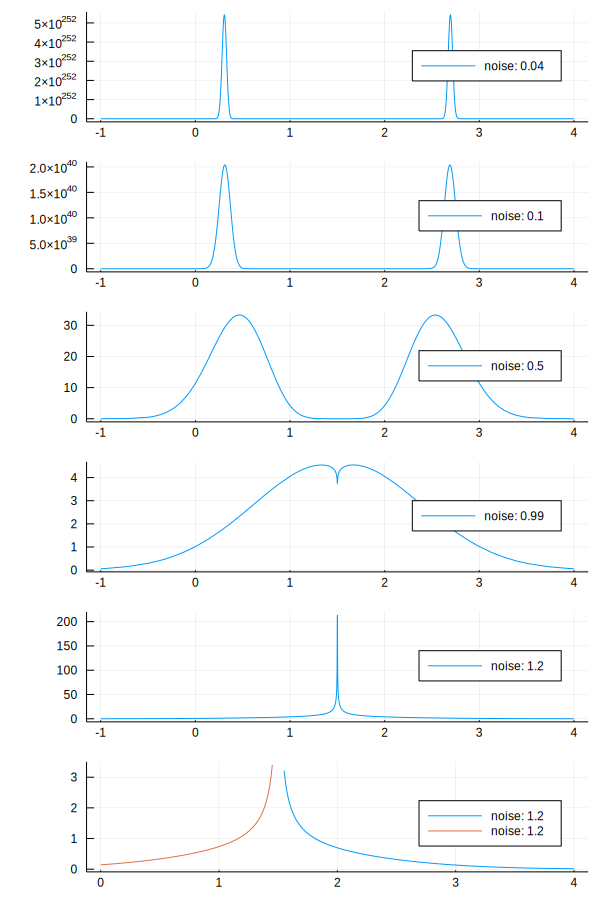

In [7]:
################################################################
# ADJUSTING NOISE LEVELS AND EFFECT ON NORMALISED SSD WITH D=0.0
################################################################

α=0.04
psx_1(x) = exp( (-2log(abs(x-1.5))) 
    - ((a1*x^2)/(α^2)) + ((2*x*(1.5*a1+b1))/(α^2)) + (2*c1*log(abs(x-1.5))/α^2) - ((2*d1)/((α^2)*(x-1.5))) ) 
p1=plot(psx_1,-1,4,label=("noise: $α"))

α=0.1
psx_2(x) = exp( (-2log(abs(x-1.5))) 
    - ((a1*x^2)/(α^2)) + ((2*x*(1.5*a1+b1))/(α^2)) + (2*c1*log(abs(x-1.5))/α^2) - ((2*d1)/((α^2)*(x-1.5))) ) 
p2=plot(psx_2,-1,4,label=("noise: $α"))

α=0.5
psx_3(x) = exp( (-2log(abs(x-1.5))) 
    - ((a1*x^2)/(α^2)) + ((2*x*(1.5*a1+b1))/(α^2)) + (2*c1*log(abs(x-1.5))/α^2) - ((2*d1)/((α^2)*(x-1.5))) ) 
p3=plot(psx_3,-1,4,label=("noise: $α"))

α=0.99
psx_4(x) = exp( (-2log(abs(x-1.5))) 
    - ((a1*x^2)/(α^2)) + ((2*x*(1.5*a1+b1))/(α^2)) + (2*c1*log(abs(x-1.5))/α^2) - ((2*d1)/((α^2)*(x-1.5))) ) 
p4=plot(psx_4,-1,4,label=("noise: $α"))

α=1.2
psx_5(x) = exp( (-2log(abs(x-1.5))) 
    - ((a1*x^2)/(α^2)) + ((2*x*(1.5*a1+b1))/(α^2)) + (2*c1*log(abs(x-1.5))/α^2) - ((2*d1)/((α^2)*(x-1.5))) ) 
p5=plot(psx_5,-1,4,label=("noise: $α"))

x_right=collect(0.0:0.01:1.45)
x_left=collect(1.55:0.01:4.0)
α=1.2
psx_6(x) = exp( (-2log(abs(x-1.5))) 
    - ((a1*x^2)/(α^2)) + ((2*x*(1.5*a1+b1))/(α^2)) + (2*c1*log(abs(x-1.5))/α^2) - ((2*d1)/((α^2)*(x-1.5))) ) 
psx_6_norm_l = psx_6.(x_left)
psx_6_norm_l = psx_6_norm_l./(0.01*sum(psx_6_norm_l)) 
plot(x_left,psx_6_norm_l,label=("noise: $α"))
psx_6_norm_r = psx_6.(x_right)
psx_6_norm_r = psx_6_norm_r./(0.01*sum(psx_6_norm_r)) 
p6=plot!(x_right,psx_6_norm_r,label=("noise: $α"))
plot(p1,p2,p3,p4,p5,p6,layout=(6,1),size=(600,900))

In [7]:
# THESE FINDING WITH HIGH LEVELS OF NOISE SEEM ODD
# WHY WITH HIGH NOISE ARE ALL CELL NOT RATHER JUST ENDING UP IN ONE WELL OR THE OTHER
# WE CAN RUN SIMULATIONS TO SEE IF WE CAN REPLICATE THIS EFFECT

# WELL, PERHAPS THIS IS NOT ODD AT ALL BUT HERE WE ARE SEEING THE EFFECTS OF MULTIPLICATIVE NOISE 
# 1. CALCULATE THE DERIVATIVE OF SSD AND SET = 0 AND SOLVE
# THE NUMBERS THAT ARE GENERATED ARE THE "NEW" STABLE STATIONARY POINTS AND WE SHOULD BE ABLE TO PROVE THAT THEY ARE
# DIFFERENT FROM WHEN NOISE=0 OR VERY LOW TO WHEN NOISE IS INCREASE BECAUSE WE SHOULD END UP WITH SOMETHING SUBTRACT
# THE NOISE TERM

In [29]:
##################################
########## SDE FUNCTION ##########
##################################
function sde(x₀, α, a, c)
    b=0.0
    d=0.0
    f(x,p,t) = -a*(x-1.5)^3+b*(x-1.5)^2+c*(x-1.5)+d
    g(x,p,t) = α*(x-1.5)
    tspan = (0.0,10.0) 
    prob = SDEProblem(f,g,x₀,tspan)
    saveat = 0.001
    sol = solve(prob,alg_hints=[:stiff],saveat=saveat)
    return sol
end
##################################

sde (generic function with 1 method)

In [30]:
##################################
########### SIMULATION ###########
##################################

# Define some parameters

# Define noise term here
noise=[0.04,0.5,0.99]
# Create an array of initial conditions [start:step_size:stop]
# Is it worth having such a small step size??? - Investigate (0.1 vs. 0.01)
in_cond = collect(-0.2:0.1:3.2)
# Number of iterations per initial condition
iter = 100
# Values of c parameter to use when solving the SDE
params = [a1,c1]

# Generate data according to 4 different functions (4 different values for c parameter)

# Array of solutions for each function
all_sols_f1_low = Array{RODESolution,2}(undef,iter,length(in_cond))
all_sols_f1_med = Array{RODESolution,2}(undef,iter,length(in_cond))
all_sols_f1_high = Array{RODESolution,2}(undef,iter,length(in_cond));

In [31]:
##################################
########### SIMULATION ###########
##################################

######################################################
# Loop over differing amounts of noise (low,med,high)
for n in noise
# Loop over each initial starting condition
    for temp_init in 1:length(in_cond)    
        # Run this code iter times for each starting condition
        for temp_iter in 1:iter
            sol_i = sde(in_cond[temp_init],n,params[1],params[2])
            if n == noise[1]
                all_sols_f1_low[temp_iter, temp_init] = sol_i
            elseif n == noise[2]
                all_sols_f1_med[temp_iter, temp_init] = sol_i
            elseif n == noise[3]
                all_sols_f1_high[temp_iter, temp_init] = sol_i  
            end               
        end
    end
end
######################################################

In [32]:
"""
Generate a normalized pdf from continuous data.
"""
function genkde(data)

    filter!(x -> !isnan(x), data)    # Remove nans from data

    kdeObj = kde(data)
    x = collect(range(minimum(data),stop=maximum(data),length=10000)) # length must be dt x 
    y_1 = map(z->pdf(kdeObj,z),x)
    y = (y_1)

    return (x,y)

end

genkde

In [33]:
########## OBTAIN VALUES FOR KDE AND PLOTTING PER FUNCTION PER NOISE LEVEL ##########

In [34]:
plot_step_size = 10;

# Generate continious data from all_sols for use in univariate kde per function
# data contains every 10th value for all timepoints 

data_f1_low = Array{Float64, 1}()
for ii in 1:length(in_cond)
    for jj in 1:iter
        data_f1_low = vcat(data_f1_low, all_sols_f1_low[jj,ii].u[1:plot_step_size:end])
    end
end
data_f1_med = Array{Float64, 1}()
for ii in 1:length(in_cond)
    for jj in 1:iter
        data_f1_med = vcat(data_f1_med, all_sols_f1_med[jj,ii].u[1:plot_step_size:end])
    end
end
data_f1_high = Array{Float64, 1}()
for ii in 1:length(in_cond)
    for jj in 1:iter
        data_f1_high = vcat(data_f1_high, all_sols_f1_high[jj,ii].u[1:plot_step_size:end])
    end
end

In [35]:
########## DENSITY ESTIMATION PER FUNCTION PER NOISE LEVEL ##########

In [36]:
x1_l,y1_l = genkde(data_f1_low)
x1_m,y1_m = genkde(data_f1_med)
x1_h,y1_h = genkde(data_f1_high);

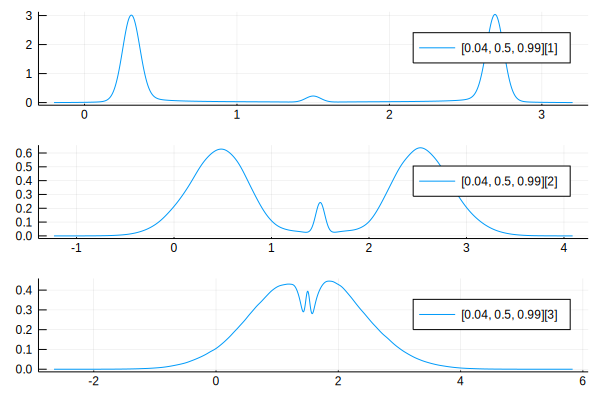

In [37]:
p1_l = plot(x1_l,y1_l)
p1_m = plot(x1_m,y1_m)
p1_h = plot(x1_h,y1_h)

fig = plot(p1_l,p1_m,p1_h,label=["$noise[1]" "$noise[2]" "$noise[3]"],layout=(3,1))

In [94]:
##################################################
# LANDSCAPE RECOVER FROM U = -LOG(Ps(x))
##################################################

# Computed analytically
# HOWEVER: there is always an issue that the solution goes to infinity when what's inside the log is zero
# therefore in this case it's when x=1.5 and when we don't have the shift it's when x=0
# SO, we can only ever recover the landscape to the right of that values and to the left of that value
# AND, this value will always fall near the saddle node no matter how the parameters change
# SO WE CAN NEVER RECOVER THE COMPLETE LANDSCAPE

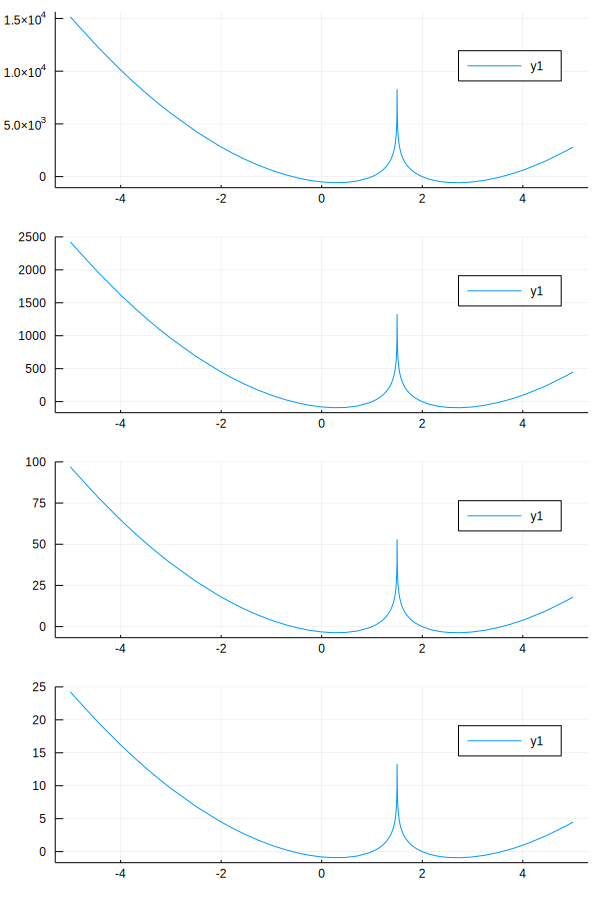

In [8]:
α=0.04
land_1(x) = (
    + ((a1*x^2)/(α^2)) - ((2*x*(1.5*a1+b1))/(α^2)) - (2*c1*log(abs(x-1.5))/α^2) + ((2*d1)/((α^2)*(x-1.5))) ) 
l1=plot(land_1)

α=0.1
land_2(x) = (
    + ((a1*x^2)/(α^2)) - ((2*x*(1.5*a1+b1))/(α^2)) - (2*c1*log(abs(x-1.5))/α^2) + ((2*d1)/((α^2)*(x-1.5))) ) 
l2=plot(land_2)

α=0.5
land_3(x) = (
    + ((a1*x^2)/(α^2)) - ((2*x*(1.5*a1+b1))/(α^2)) - (2*c1*log(abs(x-1.5))/α^2) + ((2*d1)/((α^2)*(x-1.5))) ) 
l3=plot(land_3)

α=1.0
land_4(x) = (
    + ((a1*x^2)/(α^2)) - ((2*x*(1.5*a1+b1))/(α^2)) - (2*c1*log(abs(x-1.5))/α^2) + ((2*d1)/((α^2)*(x-1.5))) ) 
l4=plot(land_4)

plot(l1,l2,l3,l4,layout=(4,1),size=(600,900))

# BUT, here we can't see the turning points that well...

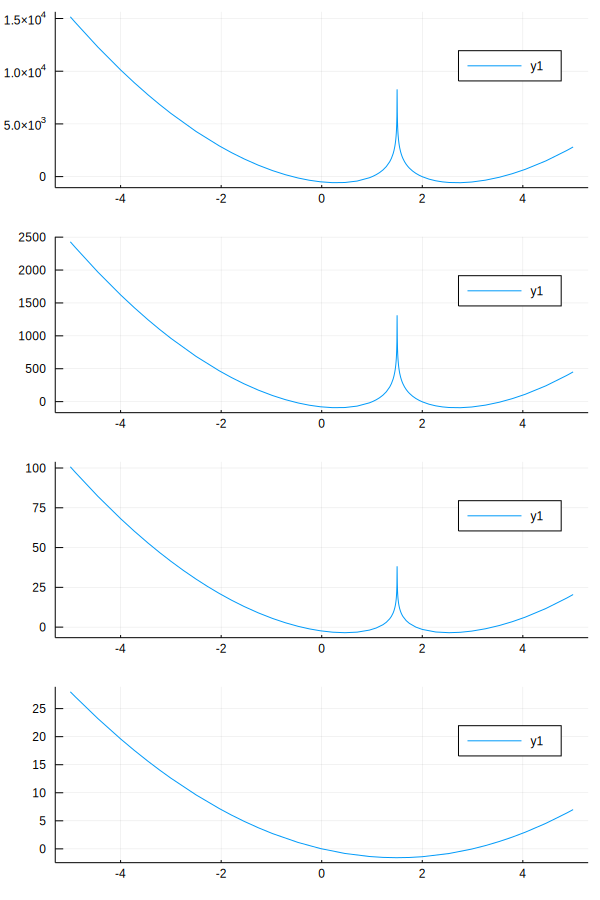

In [9]:
α=0.04
land_1(x) = (2log(abs(x-1.5))
    + ((a1*x^2)/(α^2)) - ((2*x*(1.5*a1+b1))/(α^2)) - (2*c1*log(abs(x-1.5))/α^2) + ((2*d1)/((α^2)*(x-1.5))) ) 
l1=plot(land_1)

α=0.1
land_2(x) = (2log(abs(x-1.5))
    + ((a1*x^2)/(α^2)) - ((2*x*(1.5*a1+b1))/(α^2)) - (2*c1*log(abs(x-1.5))/α^2) + ((2*d1)/((α^2)*(x-1.5))) ) 
l2=plot(land_2)

α=0.5
land_3(x) = (2log(abs(x-1.5))
    + ((a1*x^2)/(α^2)) - ((2*x*(1.5*a1+b1))/(α^2)) - (2*c1*log(abs(x-1.5))/α^2) + ((2*d1)/((α^2)*(x-1.5))) ) 
l3=plot(land_3)

α=1.0
land_4(x) = (2log(abs(x-1.5))
    + ((a1*x^2)/(α^2)) - ((2*x*(1.5*a1+b1))/(α^2)) - (2*c1*log(abs(x-1.5))/α^2) + ((2*d1)/((α^2)*(x-1.5))) ) 
l4=plot(land_4)

plot(l1,l2,l3,l4,layout=(4,1),size=(600,900))

# BUT, here we can't see the turning points that well...

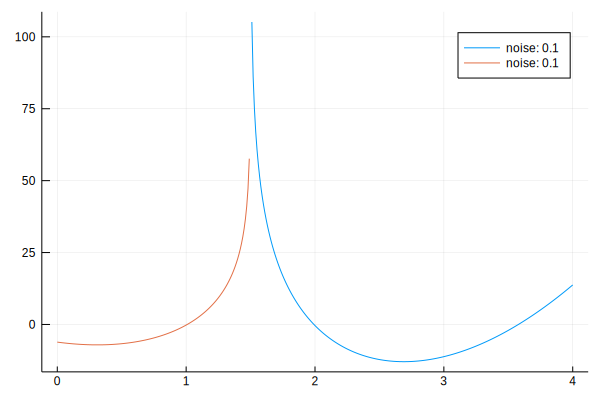

In [62]:
x_right=collect(0.0:0.01:1.49)
x_left=collect(1.51:0.01:4.0)

α=0.04
land_1(x) = (2log(abs(x-1.5))
    + ((a1*x^2)/(α^2)) - ((2*x*(1.5*a1+b1))/(α^2)) - (2*c1*log(abs(x-1.5))/α^2) + ((2*d1)/((α^2)*(x-1.5))) ) 
land1_norm_l = land_1.(x_left)
land1_norm_l = land1_norm_l./(0.01*sum(land1_norm_l)) 
plot(x_left,land1_norm_l,label=("noise: $α"))
land1_norm_r = land_1.(x_right)
land1_norm_r = land1_norm_r./(0.01*sum(land1_norm_r)) 
p1=plot!(x_right,land1_norm_r,label=("noise: $α"))

α=0.1
land_2(x) = (2log(abs(x-1.5))
    + ((a1*x^2)/(α^2)) - ((2*x*(1.5*a1+b1))/(α^2)) - (2*c1*log(abs(x-1.5))/α^2) + ((2*d1)/((α^2)*(x-1.5))) ) 
land2_norm_l = land_2.(x_left)
land2_norm_l = land2_norm_l./(0.01*sum(land2_norm_l)) 
plot(x_left,land2_norm_l,label=("noise: $α"))
land2_norm_r = land_2.(x_right)
land2_norm_r = land2_norm_r./(0.01*sum(land2_norm_r)) 
p2=plot!(x_right,land2_norm_r,label=("noise: $α"))





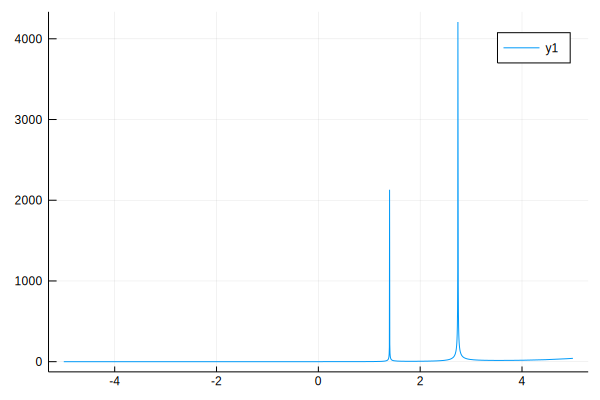

In [441]:
# g(x) = sqrt(f(x))

test(x) = exp(-log(abs(-a1*x^3+b1*x^2+c1*x+d1)) + 2*x - 1)
plot(test)

test(x) = exp(-log(abs(-a1*(x-1.5)^3+b1*(x-1.5)^2+c1*(x-1.5)+d1)) + 2*(x-1.5))
plot(test)

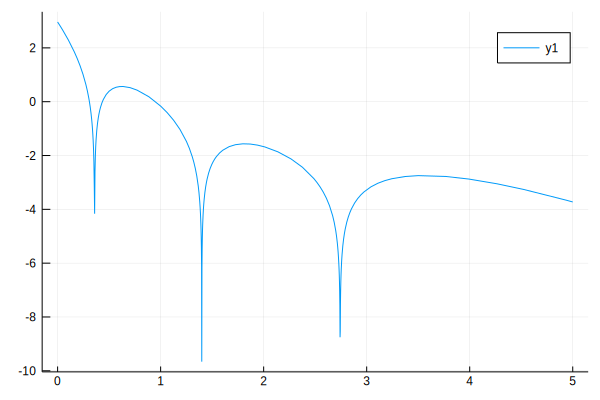

In [442]:
land_test(x) = log(abs(-a1*x^3+b1*x^2+c1*x+d1)) - 2*x
plot(land_test)

land_test(x) = log(abs(-a1*(x-1.5)^3+b1*(x-1.5)^2+c1*(x-1.5)+d1)) - 2*(x-1.5)
plot(land_test,0,5)

In [443]:
##################################################
# ANALYTICAL STEADY STATE PROBABILITY DISTRIBUTION
##################################################

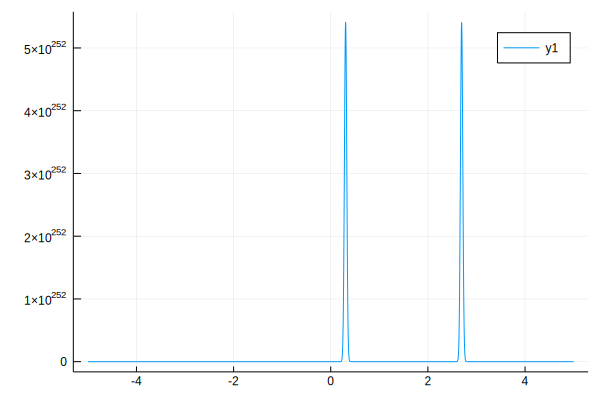

In [451]:
α=0.04
psx(x) = exp( (-2log(abs(x-1.5))) 
    - ((a1*x^2)/(α^2)) + ((2*x*(1.5*a1+b1))/(α^2)) + (2*c1*log(abs(x-1.5))/α^2) - ((2*d1)/((α^2)*(x-1.5))) ) 

plot(psx)

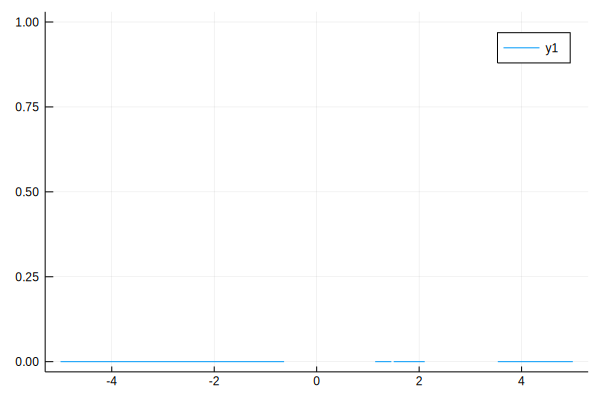

In [427]:
α=0.001
psx(x) = exp( (-2log(abs(x-1.5))) 
    - big((a1*x^2)/(α^2)) + big((2*x*(1.5*a1+b1))/(α^2)) + big(2*c1*log(abs(x-1.5))/α^2) - big((2*d1)/((α^2)*(x-1.5))) ) 

plot(psx)

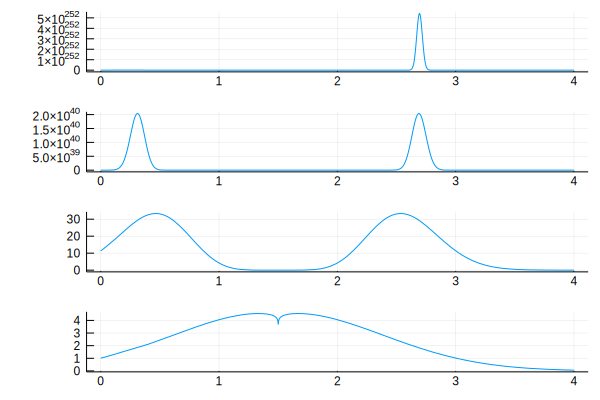

In [474]:
d1=0.0
################################################################
# ADJUSTING NOISE LEVELS AND EFFECT ON NORMALISED SSD WITH D=0.0
################################################################

# Solution is undefined for x=[1.47:1.50]

α=0.04
psx_1(x) = exp( (-2log(abs(x-1.5))) 
    - ((a1*x^2)/(α^2)) + ((2*x*(1.5*a1+b1))/(α^2)) + (2*c1*log(abs(x-1.5))/α^2) - ((2*d1)/((α^2)*(x-1.5))) ) 
p1=plot(psx_1,0,4,legend=false)

α=0.1
psx_2(x) = exp( (-2log(abs(x-1.5))) 
    - ((a1*x^2)/(α^2)) + ((2*x*(1.5*a1+b1))/(α^2)) + (2*c1*log(abs(x-1.5))/α^2) - ((2*d1)/((α^2)*(x-1.5))) ) 
p2=plot(psx_2,0,4,legend=false)

α=0.5
psx_3(x) = exp( (-2log(abs(x-1.5))) 
    - ((a1*x^2)/(α^2)) + ((2*x*(1.5*a1+b1))/(α^2)) + (2*c1*log(abs(x-1.5))/α^2) - ((2*d1)/((α^2)*(x-1.5))) ) 
p3=plot(psx_3,0,4,legend=false)

α=0.99
psx_4(x) = exp( (-2log(abs(x-1.5))) 
    - ((a1*x^2)/(α^2)) + ((2*x*(1.5*a1+b1))/(α^2)) + (2*c1*log(abs(x-1.5))/α^2) - ((2*d1)/((α^2)*(x-1.5))) ) 
p4=plot(psx_4,0,4,legend=false)

plot(p1,p2,p3,p4,layout=(4,1))

# THIS CREATES NICE CONTINUOUS PLOTS SO THE ISSUE MUST BE WITH THE LAST TERM
# IF X EVALUATES TO ZERO THEN WE WILL BE DIVIDING BY ZERO AND THEREFORE SOLUTION IS UNDEFINED AT THIS POINT

# WHEN NOISE IS HIGH THEN SOLUTION DIPS AT UNSTABLE STATIONARY POINT

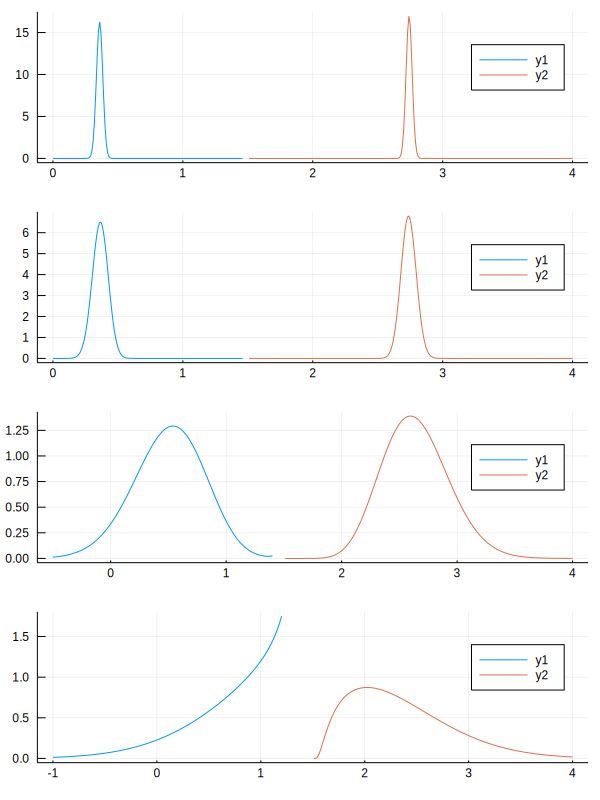

In [81]:
#####################################################
# ADJUSTING NOISE LEVELS AND EFFECT ON NORMALISED SSD
#####################################################
d1=0.1
# Solution is undefined for x=[1.47:1.50]

x_left = collect(0.0:0.01:1.46)
x_left1 = collect(-0.5:0.01:1.4)
x_left2 = collect(-1.0:0.01:1.2)
x_right = collect(1.51:0.01:4.0)
x_right1 = collect(1.51:0.01:4.0)

α=0.04
psx_1(x) = exp( (-2log(abs(x-1.5))) 
    - ((a1*x^2)/(α^2)) + ((2*x*(1.5*a1+b1))/(α^2)) + (2*c1*log(abs(x-1.5))/α^2) - ((2*d1)/((α^2)*(x-1.5))) ) 
psx_norm = psx_1.(x_left)
psx_norm = psx_norm./(0.01*sum(psx_norm)) 
plot(x_left,psx_norm)
psx_norm = psx_1.(x_right)
psx_norm = psx_norm./(0.01*sum(psx_norm)) 
p1=plot!(x_right,psx_norm)

α=0.1
psx_2(x) = exp( (-2log(abs(x-1.5))) 
    - ((a1*x^2)/(α^2)) + ((2*x*(1.5*a1+b1))/(α^2)) + (2*c1*log(abs(x-1.5))/α^2) - ((2*d1)/((α^2)*(x-1.5))) ) 
psx_norm = psx_2.(x_left)
psx_norm = psx_norm./(0.01*sum(psx_norm)) 
plot(x_left,psx_norm)
psx_norm = psx_2.(x_right)
psx_norm = psx_norm./(0.01*sum(psx_norm)) 
p2=plot!(x_right,psx_norm)

α=0.5
psx_3(x) = exp( (-2log(abs(x-1.5))) 
    - ((a1*x^2)/(α^2)) + ((2*x*(1.5*a1+b1))/(α^2)) + (2*c1*log(abs(x-1.5))/α^2) - ((2*d1)/((α^2)*(x-1.5))) ) 
psx_norm = psx_3.(x_left1)
psx_norm = psx_norm./(0.01*sum(psx_norm)) 
plot(x_left1,psx_norm)
psx_norm = psx_3.(x_right)
psx_norm = psx_norm./(0.01*sum(psx_norm)) 
p3=plot!(x_right,psx_norm)

α=1.0
psx_4(x) = exp( (-2log(abs(x-1.5))) 
    - ((a1*x^2)/(α^2)) + ((2*x*(1.5*a1+b1))/(α^2)) + (2*c1*log(abs(x-1.5))/α^2) - ((2*d1)/((α^2)*(x-1.5))) ) 
psx_norm = psx_4.(x_left2)
psx_norm = psx_norm./(0.01*sum(psx_norm)) 
plot(x_left2,psx_norm)
psx_norm = psx_4.(x_right1)
psx_norm = psx_norm./(0.01*sum(psx_norm)) 
p4=plot!(x_right1,psx_norm)

all_psx = plot(p1,p2,p3,p4,layout=(4,1),size=(600,800))

In [358]:
##################################################
# LANDSCAPE RECOVER FROM U = -LOG(Ps(x))
##################################################

# Computed analytically

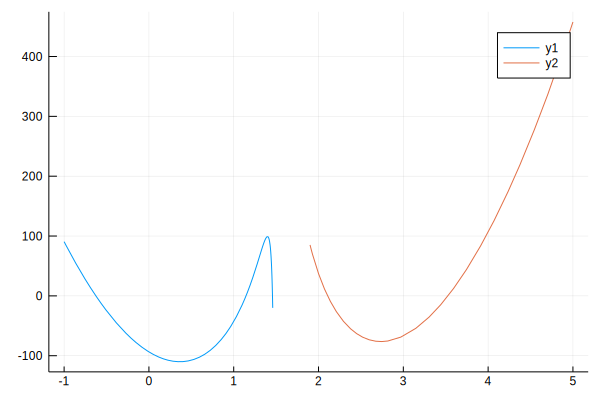

In [360]:
α=0.1
land(x) = 2log(abs(x-1.5)) + ((a1*x^2)/(α^2)) - ((2*x*(1.5*a1+b1))/(α^2)) - (2*c1*log(abs(x-1.5))/α^2) + ((2*d1)/((α^2)*(x-1.5)))

# plot(land)
plot(land, -1,1.46)
plot!(land, 1.9,5)

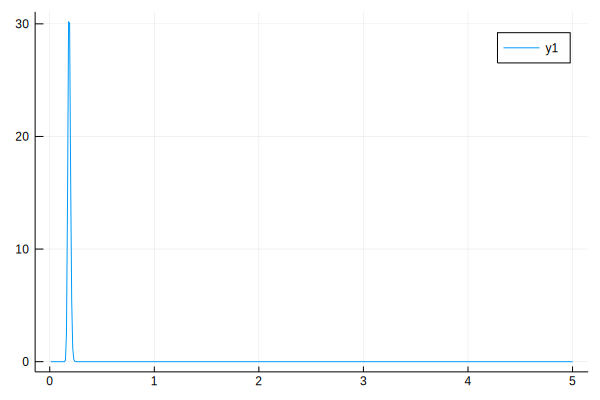

In [110]:
########## TESTING ##########
#############################

α=0.2

# excl integral evaluated at x=1
psx(x) = exp(-2log(abs(x)) - ((a1*x^2)/(α^2)) + ((2*x*(4.5*a1+b1))/(α^2)) - ((2*(6.75*a1-3*b1+c1))*log(abs(x))/(α^2)) - ((2*(3.375*a1+2.25*b1-1.5*c1+d1))/(α^2*x))) 
plot(psx)   

x = collect(0.01:0.01:5.0)
psx_norm = psx.(x)
psx_norm = psx_norm./(0.01*sum(psx_norm)) 
plot(x,psx_norm)

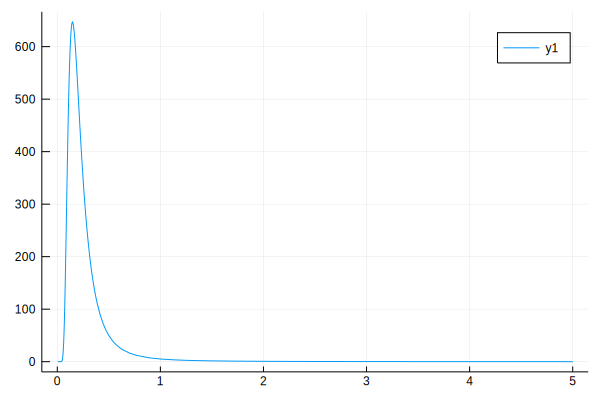

In [75]:
# eliminating b1 at beginning as it evaluates to 0

α=1.5

# excl integral evaluated at x=1
psx(x) = exp(-2log(x) + 2*( (-a1*x^2)/(2*α^2) + (4.5*a1*x)/α^2 - (6.75*a1*log(abs(x)))/α^2 - (3.375*a1-1.5+d1)/(α^2*x)))

plot(psx)

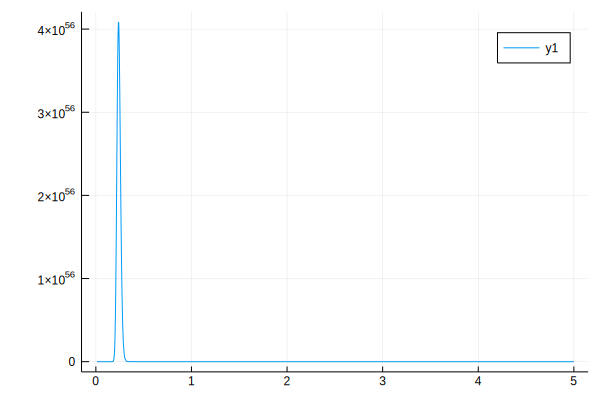

In [56]:
# incl integral evaluated at x=1
psx_1(x) = exp(-2log(x) 
    + 2*( ((-a1*x^2)/(2*α^2) + (4.5*a1*x)/α^2 - (6.75*a1*log(abs(x)))/α^2 - (3.375*a1-1.5+d1)/(α^2*x))) -
(-a1/(2*α^2) + (4.5*a1)/α^2 - (3.375*a1-1.5+d1)/α^2 ))

plot(psx_1)

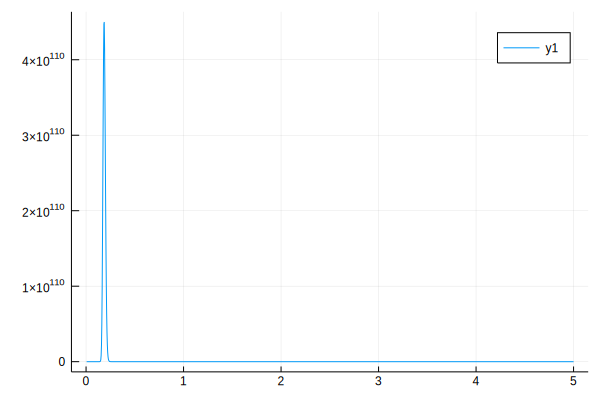

In [57]:
# Keeping the b1 term

α=0.2

t1=-a1
t2=(4.5*a1+b1)
t3=(6.75*a1-3*b1+c1)
t4=(3.375*a1+2.25*b1-1.5*c1+d1)

# excl integral evaluated at x=1
test(x) = exp(-2log(x) + 2*( (t1*x^2)/(2*α^2) + (t2*x)/α^2  - t3*log(abs(x))/α^2 - t4/(α^2*x)))
plot(test)

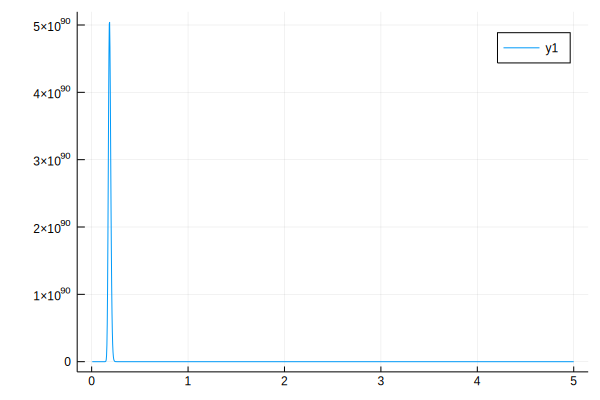

In [58]:
# incl integral evaluated at x=1
test_1(x) = exp(-2log(x) + 2*( (t1*x^2)/(2*α^2) + (t2*x)/α^2  - t3*log(abs(x))/α^2 - t4/(α^2*x))
- (-a1/(2*α^2) + t2/α^2 - t4/(α^2)))
plot(test_1)

In [59]:
#############################################################
# NORMALISED ANALYTICAL STEADY STATE PROBABILITY DISTRIBUTION
#############################################################

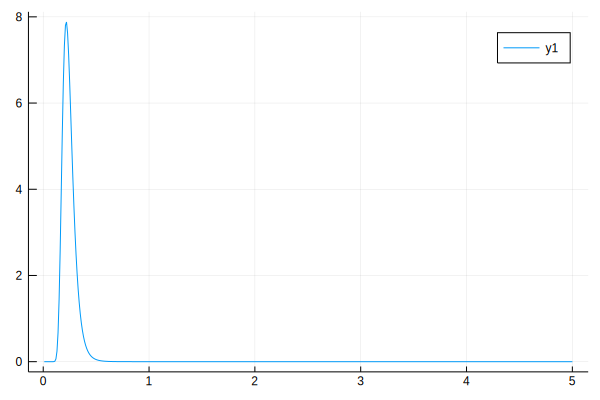

In [94]:
x = collect(0.01:0.01:5.0)
psx_norm = psx_1.(x)
psx_norm = psx_norm./(0.01*sum(psx_norm)) 
plot(x,psx_norm)

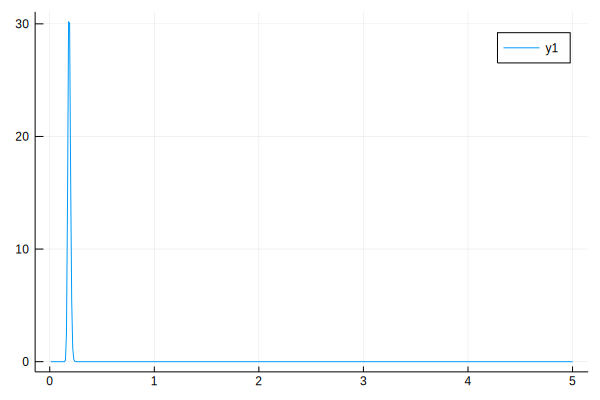

In [61]:
x = collect(0.01:0.01:5.0)
test_1_norm = test_1.(x)
test_1_norm = test_1_norm./(0.01*sum(test_1_norm)) 
plot(x,test_1_norm)

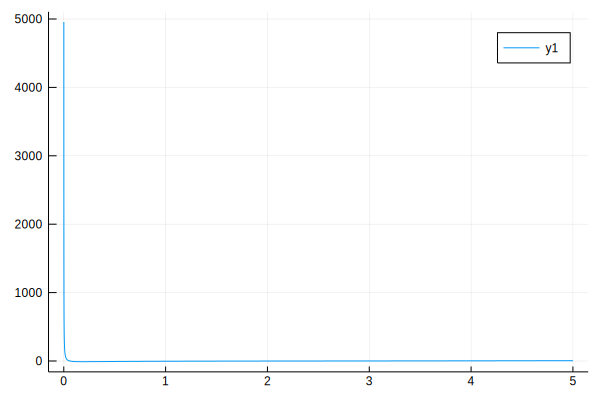

In [123]:
α=1.0

land_psx_1(x) = 2log(x) -2*((-a1*x^2)/(2*α^2) + (4.5*a1*x)/α^2 - (6.75*a1*log(abs(x)))/α^2 - (3.375*a1-1.5+d1)/(α^2*x)) 
+ (-a1/(2*α^2) + (4.5*a1)/α^2 - (3.375*a1-1.5+d1)/α^2)

plot(land_psx_1)

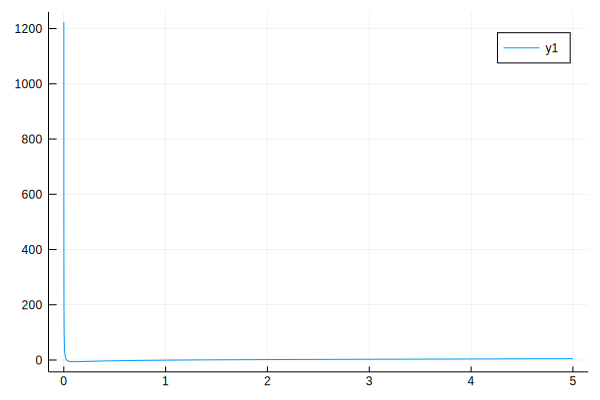

In [64]:
land_test_1(x) = 2log(x) - 2*((t1*x^2)/(2*α^2) + (t2*x)/α^2  - t3*log(abs(x))/α^2 - t4/(α^2*x)) + (-a1/(2*α^2) + t2/α^2 - t4/(α^2))

plot(land_test_1)